# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [79]:
df = pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [80]:
type(df)

pandas.core.frame.DataFrame

In [81]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [12]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [13]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

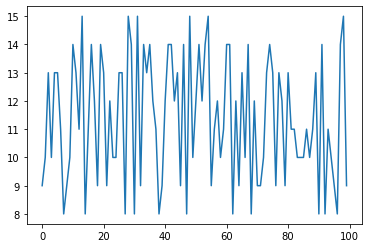

In [14]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

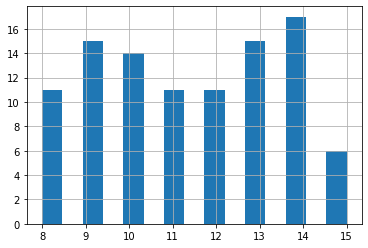

In [16]:
df.國文.hist(bins = 15)

## 3 一些基本的資料分析

算平均。

In [17]:
df.國文.mean()

11.39

算標準差。

In [18]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [20]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [21]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [22]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [82]:
df["總級分"] = df.sum(axis = 1)
df.head()

/var/folders/9y/b7ghtgms4zb3_7kn0z4v3hz00000gn/T/ipykernel_10632/1830821528.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["總級分"] = df.sum(axis = 1)


,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


### 【技巧】

有計算的當然也可以的。

In [85]:
df["加權"] = df.國文 + df.英文 + df.數學*2
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53


,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [83]:
df.sort_values(by = "總級分", ascending = False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分
80,施雅鈴,13,15,12,13,13,66
12,李正偉,11,15,11,14,15,66
54,陳怡潔,15,15,9,15,11,65
25,蔡亦瑄,13,13,14,13,12,65
57,胡淳茜,12,15,14,13,11,65
37,曾怡君,11,12,15,13,14,65
48,陳怡婷,15,14,12,9,15,65
64,俞志峰,9,14,13,14,15,65
83,李士賢,10,14,15,13,13,65
87,趙偉希,10,13,14,13,15,65


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [100]:
df2 = df.sort_values(by = ["加權", "總級分"], ascending = False)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58
57,胡淳茜,12,15,14,13,11,65,55
36,詹威德,12,13,15,10,14,64,55
25,蔡亦瑄,13,13,14,13,12,65,54
83,李士賢,10,14,15,13,13,65,54


### 【重點】重設 index

In [101]:
df2.index = range(1, 101)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [110]:
df2[df2.數學 == '15']

,姓名,國文,英文,數學,自然,社會,總級分,加權


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [107]:
df2.drop("總級分", axis = 1)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [111]:
df2.drop("總級分", axis = 1, inplace = True)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [112]:
df2.drop(5).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [117]:
df2.drop(df2[df2.姓名 == "李士賢"].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


In [115]:
df2[df2.姓名 == "李士賢"]

,姓名,國文,英文,數學,自然,社會,加權
5,李士賢,10,14,15,13,13,54


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [6]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

                  High         Low        Open       Close       Volume  \
Date                                                                      
2017-07-21   37.610001   37.220001   37.497501   37.567501  105010400.0   
2017-07-24   38.110001   37.474998   37.645000   38.022499   85972800.0   
2017-07-25   38.459999   37.950001   37.950001   38.185001   75415600.0   
2017-07-26   38.482498   38.264999   38.337502   38.365002   63124000.0   
2017-07-27   38.497501   36.825001   38.437500   37.639999  129905200.0   
...                ...         ...         ...         ...          ...   
2022-07-14  148.949997  143.250000  144.080002  148.470001   78140700.0   
2022-07-15  150.860001  148.199997  149.779999  150.169998   76030800.0   
2022-07-18  151.570007  146.699997  150.740005  147.070007   81420900.0   
2022-07-19  151.229996  146.910004  147.919998  151.000000   82982400.0   
2022-07-20  153.720001  150.369995  151.119995  153.039993   64759500.0   

             Adj Close  

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [8]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-21,37.610001,37.220001,37.497501,37.567501,105010400.0,35.563881
2017-07-24,38.110001,37.474998,37.645000,38.022499,85972800.0,35.994617
2017-07-25,38.459999,37.950001,37.950001,38.185001,75415600.0,36.148441
2017-07-26,38.482498,38.264999,38.337502,38.365002,63124000.0,36.318844
2017-07-27,38.497501,36.825001,38.437500,37.639999,129905200.0,35.632515


#### 只要最後 300 個交易日!

In [9]:
df = df[-300:]
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-12,124.639999,122.250000,123.400002,122.769997,112172300.0,122.072563
2021-05-13,126.150002,124.260002,124.580002,124.970001,105861300.0,124.260071
2021-05-14,127.889999,125.849998,126.250000,127.449997,81918000.0,126.725990
2021-05-17,126.930000,125.169998,126.820000,126.269997,74244600.0,125.552689
2021-05-18,126.989998,124.779999,126.559998,124.849998,63342900.0,124.140747
...,...,...,...,...,...,...
2022-07-14,148.949997,143.250000,144.080002,148.470001,78140700.0,148.470001
2022-07-15,150.860001,148.199997,149.779999,150.169998,76030800.0,150.169998
2022-07-18,151.570007,146.699997,150.740005,147.070007,81420900.0,147.070007


#### 20 日的移動平均

<AxesSubplot:xlabel='Date'>

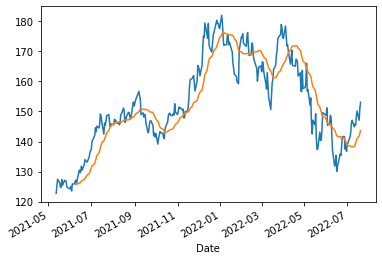

In [12]:
df.Close.plot()
df.Close.rolling(20).mean().plot()

<AxesSubplot:xlabel='Date'>

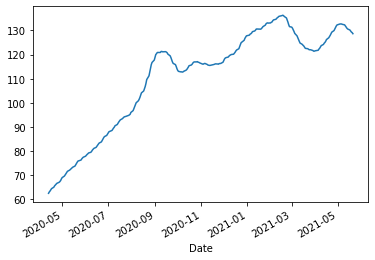

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

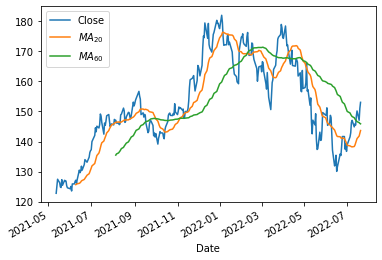

In [14]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [15]:
close = df.Close.values
len(close)

300

In [16]:
x = close[:-1]
len(x)

299

In [17]:
y = close[1:]
len(y)

299

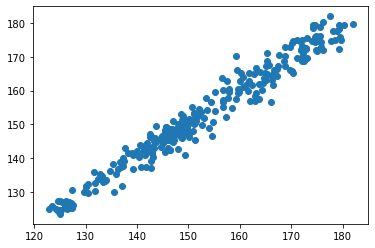

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [20]:
mydata = np.random.randn(4,3)

In [21]:
mydata

array([[ 0.01886447,  1.06255516,  0.96458239],
       [-2.7353412 ,  0.64892187,  0.0605574 ],
       [ 0.39712179, -0.77110144, -1.43695141],
       [ 0.44335119,  0.97030921, -0.7830205 ]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [22]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [23]:
df2

,A,B,C
0,0.018864,1.062555,0.964582
1,-2.735341,0.648922,0.060557
2,0.397122,-0.771101,-1.436951
3,0.443351,0.970309,-0.783020


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [24]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [25]:
df3

,A,B,C
0,0.971516,0.806800,-0.615120
1,-0.371790,-0.592237,-0.409534
2,-0.382607,0.143633,0.936024


In [27]:
df4 = pd.concat([df2, df3],axis = 0)

In [28]:
df4

,A,B,C
0,0.018864,1.062555,0.964582
1,-2.735341,0.648922,0.060557
2,0.397122,-0.771101,-1.436951
3,0.443351,0.970309,-0.783020
0,0.971516,0.806800,-0.615120
1,-0.371790,-0.592237,-0.409534
2,-0.382607,0.143633,0.936024


前面我們弄得亂七八糟的 index 重設一下。

In [29]:
df4.index = range(7)

In [30]:
df4

,A,B,C
0,0.018864,1.062555,0.964582
1,-2.735341,0.648922,0.060557
2,0.397122,-0.771101,-1.436951
3,0.443351,0.970309,-0.783020
4,0.971516,0.806800,-0.615120
5,-0.371790,-0.592237,-0.409534
6,-0.382607,0.143633,0.936024


#### 横向的貼

In [31]:
df5  = pd.concat([df2, df3],axis = 1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [32]:
df5

,A,B,C,A,B,C
0,0.018864,1.062555,0.964582,0.971516,0.806800,-0.615120
1,-2.735341,0.648922,0.060557,-0.371790,-0.592237,-0.409534
2,0.397122,-0.771101,-1.436951,-0.382607,0.143633,0.936024
3,0.443351,0.970309,-0.783020,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [34]:
df_names = pd.read_csv('data/names.csv', names = ["姓名"])

In [35]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [37]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [38]:
df_grades

,國文,英文,數學,社會,自然
0,12,13,6,12,6
1,6,9,12,6,14
2,9,7,12,13,9
3,10,11,15,6,10
4,7,11,13,8,6
...,...,...,...,...,...
95,6,9,7,8,10
96,7,10,9,8,10
97,6,15,10,14,11
98,15,9,9,13,10


In [46]:
df_grades.to_csv('data/grade2.csv', index = 0)

In [43]:
df_names = pd.read_csv('data/names.csv', names = ["姓名"])

In [50]:
df_x = pd.concat([df_names, df_grades], axis = 1)
df_x

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,12,13,6,12,6
1,王紹尹,6,9,12,6,14
2,黃季坤,9,7,12,13,9
3,許正書,10,11,15,6,10
4,張鈞蓮,7,11,13,8,6
...,...,...,...,...,...,...
95,陳君生,6,9,7,8,10
96,曾桂甫,7,10,9,8,10
97,林欣怡,6,15,10,14,11
98,林佳霖,15,9,9,13,10


In [40]:
import pandas as pd #自己試試看用的～
players = {
    "name":["Ohtani", "Trout", "Judge", "Stanton"],
    "hits":[150, 142, 170, 120],
    "BB":[60, 52, 49, 38]
}
MVP = ["1st", "2nd", "3rd", "4th"]

look = pd.DataFrame(players, index = MVP)
look

,name,hits,BB
1st,Ohtani,150,60
2nd,Trout,142,52
3rd,Judge,170,49
4th,Stanton,120,38
